In [1]:
from scipy.optimize import root_scalar, root
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
cm = 1/2.54  
width = 12*cm 

In [68]:
# physical functions


def AOK(k,Gam,sgam):
    return Gam*(Gam+sgam-k)

def minF(w,k,G,gamma):
    if k>0:
        if k>G+gamma:
            if w!=0:
                return (2*w-np.sqrt(w**2-3/2*AOK(k,G,gamma)))/3/k
            else:
                return -np.sqrt(-G/2*(G+gamma-k)/k**2)*0.9
        else:
            return 0
               
    else:
        return -w*G/2/(G/2*(G+gamma)+w**2)+1/10**3
def maxF(w,k,G,gamma):
    if k>0:
        return (2*w+np.sqrt(w**2-3/2*AOK(k,G,gamma)))/3/k
    else:
        if w==0:
            return 0#(2-np.sqrt(1-3/2*10**8*AOK(k,G,gamma)))/3
        else:
            return (2+np.sqrt(1-3/2/w**2*AOK(k,G,gamma)))/3*w*10**5

# def lamtest(y,w,k,Gam,sgam):
#     A = AOK(k,Gam,sgam)
#     p = Gam**2/w**2+A/w**2/2+3*y**2-4*y+1
#     q = Gam**2/w**2*(A/w**2/2+3*y**2-4*y+1)+Gam**2/k**2*(2*y-k/w)*(y-k/w)
#     return p, p**2-4*q
    # return (-p+np.sqrt(p**2-4*q))/2, p,p**2-4*q

def lamtest(y,w,k,Gam,sgam):
    A = AOK(k,Gam,sgam)
    p = Gam**2+A/2+k**2*y**2-y*w*k
    q = Gam**2*(A/2+k**2*y**2-y*w*k)+Gam**2*(2*y*k-w)*(y*k-w)
    return p, p**2-4*q, q


def BK(W,K):
    return K/2/W**2

def yKnax(W,K):
    return (2+np.sqrt(1-3/2*(1-K)/W**2))/3
def yKnix(W,K):
    return (2-np.sqrt(1-3/2*(1-K)/W**2))/3
def FKK(W,K):
    return -BK(W,K)+yKnax(W,K)**3*2-2*yKnax(W,K)**2

def Foriginal(x,y,w,k,delta,Gamma,gamma):
    eqx = -Gamma*delta*y-AOK(k,Gamma,gamma)*x-2*k**2*(x**2+y**2)+2*w*k*x*y
    eqy = Gamma*delta*x-w*Gamma-AOK(k,Gamma,gamma)*y-2*k**2*y*(x**2+y**2)+2*k*w*(x**2+2*y**2)-2*w**2*y
    return np.array([eqx,eqy])

def y1ofx(x,w,k,delta,Gamma,gamma):
    if x==0:
        return 0
    return 1/(2*k**2*x)*(k*w*x-Gamma*delta/2+np.sqrt((k*w*x-Gamma*delta/2)**2-4*x*k**2*(k**2*x**3+AOK(k,Gamma,gamma)/2)))

def insq(x,w,k,delta,Gamma,gamma):
    return (k*w*x-Gamma*delta/2)**2-4*x*k**2*(k**2*x**3+AOK(k,Gamma,gamma)/2)

def y2ofx(x,w,k,delta,Gamma,gamma):
    if x==0:
        return w/k
    return 1/(2*k**2*x)*(k*w*x-Gamma*delta/2-np.sqrt((k*w*x-Gamma*delta/2)**2-4*x*k**2*(k**2*x**3+AOK(k,Gamma,gamma)/2)))

def Fx(x,w,k,delta,Gamma,gamma,s):
    if s==1:
        y = y1ofx(x,w,k,delta,Gamma,gamma)
    if s==2:
        y = y2ofx(x,w,k,delta,Gamma,gamma)
    return Gamma*delta*x-w*Gamma-AOK(k,Gamma,gamma)*y-2*k**2*y*(x**2+y**2)+2*k*w*(x**2+2*y**2)-2*w**2*y

def Fx2(x,w,k,delta,Gamma,gamma):
    y = y2ofx(x,w,k,delta,Gamma,gamma)
    return Gamma*delta*x-w*Gamma-AOK(k,Gamma,gamma)*y-2*k**2*y*(x**2+y**2)+2*k*w*(x**2+2*y**2)-2*w**2*y

def m_z(x,y,omega,kappa,Gamma):
    return 1/2 -(kappa*(y**2+x**2)-omega*y)/Gamma
def set_xgird(w,k,delta,Gamma,gamma,points=False):
    grid1 = np.linspace(-0.5-1/10**5,0.5+1/10**5,40)
    pos = 0
    p1= None
    p2 = None
    if max(insq(grid1,w,k,delta,Gamma,gamma))<0:# or min(insq(grid1,w,k,delta,Gamma,gamma))>0:
        # print('no solution')
        return np.array([-2]), None
    gridpoints = []
    newgrid = np.array([0])
    if insq(grid1[0],w,k,delta,Gamma,gamma)>=0:
        if insq(grid1[0]+1/10**5,w,k,delta,Gamma,gamma)>=0:
            p1 = grid1[0]
            gridpoints.append(p1)
    for i in range(len(grid1)-1):
        f1 = insq(grid1[i],w,k,delta,Gamma,gamma)
        f2 = insq(grid1[i+1],w,k,delta,Gamma,gamma)
        if f1*f2<=0:
            r = root_scalar(insq,args=(w,k,delta,Gamma,gamma),method='bisect',bracket=(grid1[i],grid1[i+1]))
            # print(r.root)
            if p1!=None:
                p2 = r.root
                newgrid = np.concatenate((newgrid,np.linspace(p1,p2,30)))
                # print(np.linspace(p1,p2,30))
                gridpoints.append(p2)
                p1=None
            else:
                p1 = r.root
                gridpoints.append(p1)
    if p1!=None:
        newgrid = np.concatenate((newgrid,np.linspace(p1,grid1[-1],30)))
        gridpoints.append(grid1[-1])
    if points==True:
        return newgrid[1:], np.array(gridpoints)
    return newgrid[1:]




In [3]:
#Plotting Class



class TickProperties():
    
    major_xtick_step = 5,
    minor_xtick_step = 1
    major_ytick_step = 5
    minor_ytick_step = 1
    STRIP_OF_ZEROS_X = False
    STRIP_OF_ZEROS_Y = False

    def __init__(self,\
    xtick_step_major = 5,\
    xtick_step_minor = 1,\
    ytick_step_major = 5,\
    ytick_step_minor = 1,\
    SZX = False,\
    SZY = False):
        self.major_xtick_step = xtick_step_major
        self.minor_xtick_step = xtick_step_minor
        self.major_ytick_step = ytick_step_major
        self.minor_ytick_step = ytick_step_minor
        self.STRIP_OF_ZEROS_X = SZX
        self.STRIP_OF_ZEROS_Y = SZY

class Format():
    numb_xticks = None
    numb_yticks = None
    custom_func_x = None
    custom_func_y = None
    x_scale = None
    y_scale = None
    x_precion = "{:.2f}"
    y_precion = "{:.2f}"
    def __init__(self,numb_xticks=None,numb_yticks=None,custom_funx=None,custom_funy=None,xscale=None,yscale=None,xprec="{:.2f}",yprec="{:.2f}"):
        self.numb_xticks =numb_xticks
        self.numb_yticks = numb_yticks
        self.custom_func_x = custom_funx
        self.custom_func_y = custom_funy
        self.x_precion=xprec
        self.y_precion = yprec
        self.x_scale = xscale
        self.y_scale = yscale
    def formatx0(self,x,pos):
        try:
                # print(x,pos)#,"{:.2f}".format(w[int(x)]))
            
            index = int((pos-1)*self.x_scale.shape[0]//self.numb_xticks)
            # print(index)
            # print()
            return self.x_precion.format(self.x_scale[index])
        except:
            return self.x_precion.format(self.x_scale[-1])
    def formatx1(self,x,pos):
        try:
                # print(x,pos)#,"{:.2f}".format(w[int(x)]))

            index = int((pos-1)*self.x_scale.shape[0]//self.numb_xticks)
            # print(index)
            # print()
            return self.x_precion.format(self.x_scale[index])
        except:
            return self.x_precion.format(self.x_scale[-1])
    
    def formaty1(self,x,pos):
        try:
                # print(x,pos)#,"{:.2f}".format(w[int(x)]))

            index = int((pos-1)*self.y_scale.shape[0]//self.numb_yticks)
            # print(index)
            # print()
            return self.y_precion.format(self.y_scale[index])
        except:
            return self.y_precion.format(self.y_scale[-1])
        
    def formaty(self,x,pos):
        try:
            return self.y_precion.format(self.y_scale[int(x)])
        except:
            return ""

class Setup_Fig():
    DEFAULT_HEAT_EXTEND = (-0.5,39.5,29.5,-0.5)
    xlim = None
    ylim = None
    tickprop = TickProperties()
    formatter = Format()
    cm = 1/2.54 
    fig_width = 12*cm
    fig_height = 4.8/6.4*12*cm
    name_of_plot = None
    def __init__(self,name_of_plot = "sign_of_ev1.pdf",xlim=None,ylim=None,tickp=TickProperties(),formater=Format()):
        self.xlim=xlim
        self.ylim = ylim   
        self.tickprop =tickp       
        self.formatter = formater
        self.name_of_plot = name_of_plot

    
    plt.rcParams["lines.markersize"]=0.7
    plt.rcParams["axes.unicode_minus"]=True
    plt.rcParams["font.size"]=10
    plt.rcParams["text.usetex"]=True
    plt.rcParams["font.serif"]="Computer Modern Serif"
# ax.scatter(A,root,color='0')
    



    def return_fig(self,shape=(1,1),dots_per_inch=400,xax_share=False,yax_share=False,joined=False):
        
        fig, ax = plt.subplots(*shape,figsize=(self.fig_width,self.fig_height),dpi=dots_per_inch,sharex=xax_share,sharey=yax_share)
        trash, xw, yw, trash=self.DEFAULT_HEAT_EXTEND# im.get_extent()
        self.formatter.numb_xticks = xw//self.tickprop.major_xtick_step+1
        self.formatter.numb_yticks = yw//self.tickprop.major_ytick_step+1
        
        for i in range(shape[0]):
            for j in range(shape[1]):
                pos= 'outer_left'
                if shape[0]==1:
                    if shape[1]==1:
                        current_ax = ax
                    else:
                        current_ax = ax[j]
                else:
                    if shape[1]==1:
                        current_ax = ax[i]
                    else:
                        current_ax = ax[i,j]
                        if j==0:
                           pos= 'outer_left'
                        elif j<shape[1]-1:
                            pos = 'middle'
                        elif j==shape[1]-1:
                            pos = 'outer_right'
                        


        # axlimits have to be adapted
                try:
                    current_ax.set_xlim(*self.xlim)
                except:
                    pass
                try:
                    current_ax.set_ylim(*self.ylim)
                except:
                    pass    
            

                if self.tickprop.STRIP_OF_ZEROS_X:
                    current_ax.xaxis.set_major_formatter(ticker.FuncFormatter(self.formatter.formatx0))
                current_ax.yaxis.set_major_locator(ticker.MultipleLocator(self.tickprop.major_ytick_step))
                current_ax.yaxis.set_minor_locator(ticker.MultipleLocator(self.tickprop.minor_ytick_step))
                current_ax.xaxis.set_major_locator(ticker.MultipleLocator(self.tickprop.major_xtick_step))
                current_ax.xaxis.set_minor_locator(ticker.MultipleLocator(self.tickprop.minor_xtick_step))

                if self.tickprop.STRIP_OF_ZEROS_Y:
                    current_ax.yaxis.set_major_formatter(ticker.FuncFormatter(self.formatter.formaty1))  

                if joined:
                    if i<shape[0]-1:
                        current_ax.tick_params(axis='x',direction='in',which='both',bottom=True,top=True,labelbottom=False)
                    else:
                        current_ax.tick_params(axis='x',direction='in',which='both',bottom=True,top=True,labelbottom=True)
                        
                    if pos=='outer_left':
                        current_ax.tick_params(axis='y',direction='in',which='both',left=True,right=True,labelleft=True)
                    elif pos=='middle':
                        current_ax.tick_params(axis='y',direction='in',which='both',left=True,right=True,labelleft=False)
                    elif pos=='outer_right':
                        current_ax.tick_params(axis='y',direction='in',which='both',left=True,right=True,labelright=True)
                        # current_ax.set_xlabel(r'$\Gamma \tilde{A}$')
                        # current_ax.set_ylabel(r'$\tilde{y}$',rotation=0)
                else:
                    current_ax.tick_params(axis='x',direction='in',which='both',bottom=True,top=True,labelbottom=True)
                    
                    current_ax.tick_params(axis='y',direction='in',which='both',left=True,right=True,labelleft=True)   


                current_ax.tick_params(axis='both',which='major',length=4.5)
                plt.setp(current_ax.yaxis.get_majorticklabels(),va='center')
        
        return fig, ax





In [45]:
Gam = 1
sgam = 0.2
s =1
k= np.linspace(1/10**5,10,30)
w = np.linspace(0,6,30)
d = np.linspace(-5,5,30)
xsol = np.ones((30,30,30,10))
# xgrid = np.linspace(-0.5-1/10**5,0.5+1/10**5,40)
solution_number = np.zeros((30,30,30))
for ik, kval in enumerate(k):
    for iw, wval in enumerate(w):
        for id, dval in enumerate(d):
            sol_numb = 0
            xgrid = set_xgird(wval,kval,dval,Gam,sgam)
            # print(xgrid)
            if xgrid[0]==-2:
                continue
            for j in range(len(xgrid)-1):
                
                Fl = Fx(xgrid[j],wval,kval,dval,Gam,sgam,s)
                Fu = Fx(xgrid[j+1],wval,kval,dval,Gam,sgam,s)
                if Fl*Fu<=0:
                    r = root_scalar(Fx,args=(wval,kval,dval,Gam,sgam,s),method='bisect',bracket=(xgrid[j],xgrid[j+1]))
                    xsol[ik,iw,id,sol_numb] = r.root
                    sol_numb+=1
            solution_number[ik,iw,id]=sol_numb
            if sol_numb==0:
                print(kval,wval,dval)
                
                # print(xgrid)






0.3448372413793104 0.0 0.1724137931034484
0.3448372413793104 0.0 0.5172413793103452
0.3448372413793104 0.20689655172413793 0.1724137931034484
0.3448372413793104 0.20689655172413793 0.5172413793103452
0.3448372413793104 0.41379310344827586 0.1724137931034484
0.3448372413793104 0.41379310344827586 0.5172413793103452
0.3448372413793104 0.6206896551724138 0.1724137931034484
0.3448372413793104 0.6206896551724138 0.5172413793103452
0.3448372413793104 0.6206896551724138 0.862068965517242
0.3448372413793104 0.8275862068965517 0.1724137931034484
0.3448372413793104 0.8275862068965517 0.5172413793103452
0.3448372413793104 0.8275862068965517 0.862068965517242
0.3448372413793104 1.0344827586206897 0.1724137931034484
0.3448372413793104 1.0344827586206897 0.5172413793103452
0.3448372413793104 1.0344827586206897 0.862068965517242
0.3448372413793104 1.2413793103448276 0.1724137931034484
0.3448372413793104 1.2413793103448276 0.5172413793103452
0.3448372413793104 1.2413793103448276 0.862068965517242
0.34

/tmp/ipykernel_207419/712848189.py:60: RuntimeWarning: invalid value encountered in sqrt
  return 1/(2*k**2*x)*(k*w*x-Gamma*delta/2+np.sqrt((k*w*x-Gamma*delta/2)**2-4*x*k**2*(k**2*x**3+AOK(k,Gamma,gamma)/2)))


1.3793189655172415 3.9310344827586206 -0.1724137931034484
1.3793189655172415 3.9310344827586206 3.9655172413793114
1.3793189655172415 3.9310344827586206 4.310344827586208
1.3793189655172415 3.9310344827586206 5.0
1.3793189655172415 4.137931034482759 3.9655172413793114
1.3793189655172415 4.137931034482759 4.655172413793103
1.3793189655172415 4.344827586206897 4.310344827586208
1.3793189655172415 4.344827586206897 4.655172413793103
1.3793189655172415 4.344827586206897 5.0
1.3793189655172415 4.551724137931035 -0.1724137931034484
1.3793189655172415 4.551724137931035 4.655172413793103
1.3793189655172415 4.551724137931035 5.0
1.3793189655172415 4.758620689655173 4.655172413793103
1.3793189655172415 4.758620689655173 5.0
1.3793189655172415 4.9655172413793105 5.0
1.3793189655172415 5.172413793103448 -0.1724137931034484
1.3793189655172415 5.793103448275862 -0.1724137931034484
1.7241462068965518 0.0 -0.1724137931034484
1.7241462068965518 0.20689655172413793 0.1724137931034484
1.7241462068965518 

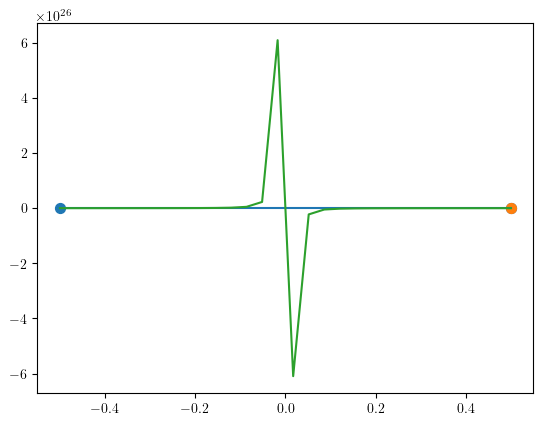

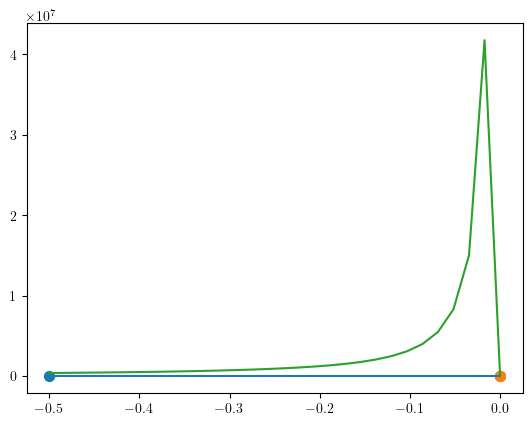

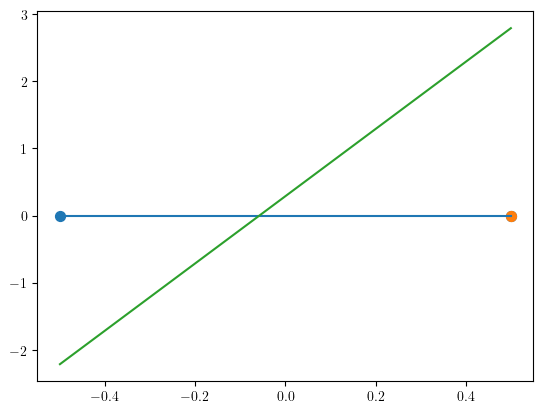

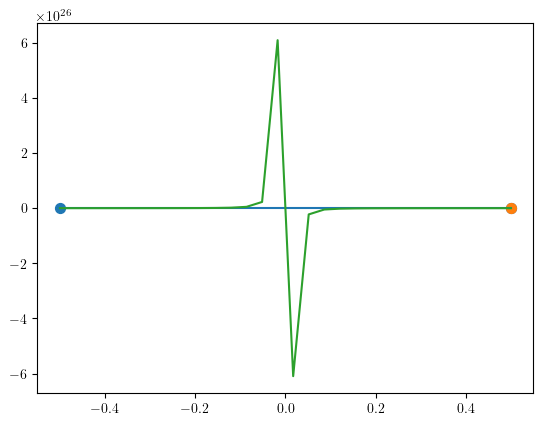

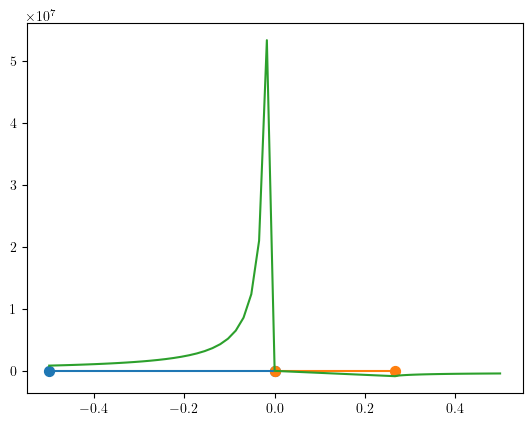

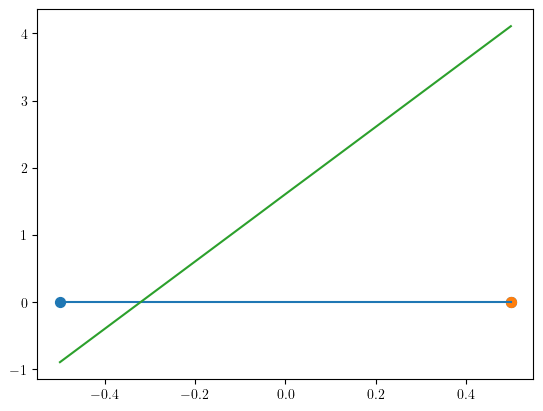

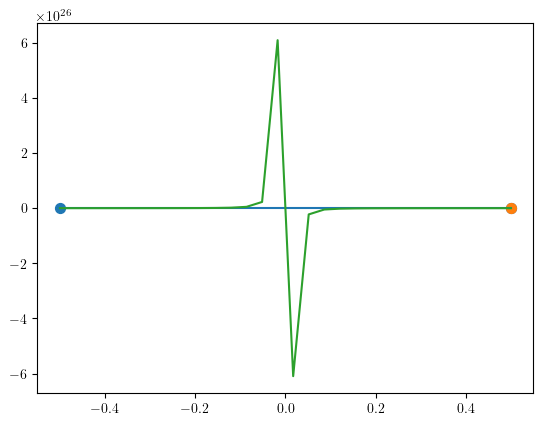

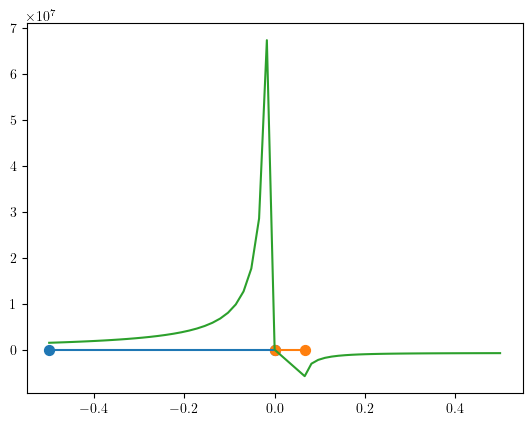

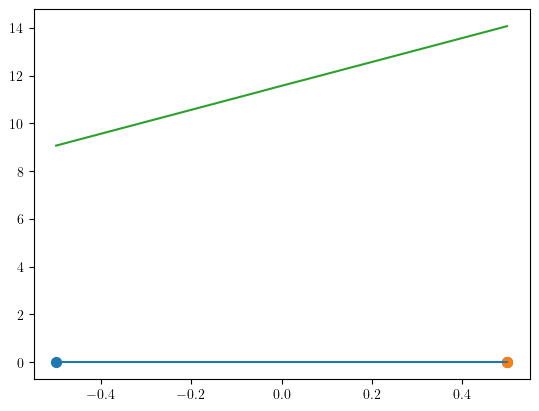

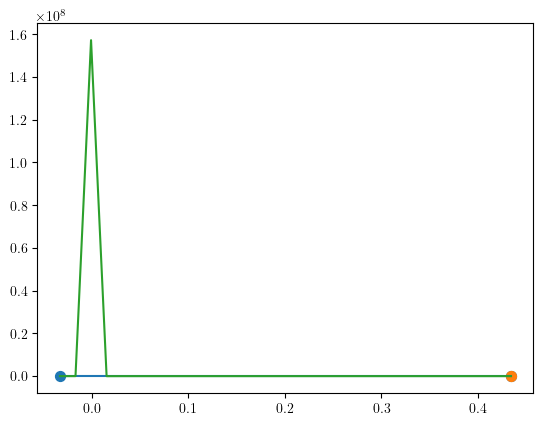

/tmp/ipykernel_207419/722408274.py:60: RuntimeWarning: invalid value encountered in sqrt
  return 1/(2*k**2*x)*(k*w*x-Gamma*delta/2+np.sqrt((k*w*x-Gamma*delta/2)**2-4*x*k**2*(k**2*x**3+AOK(k,Gamma,gamma)/2)))


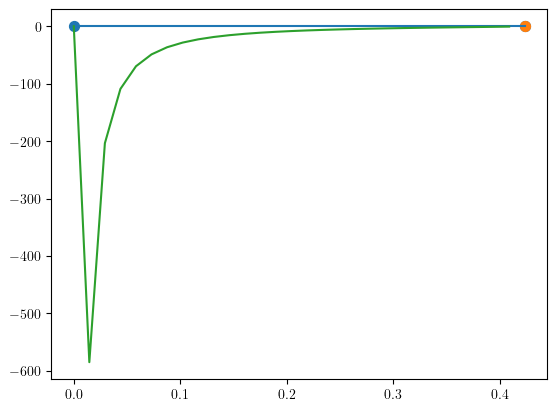

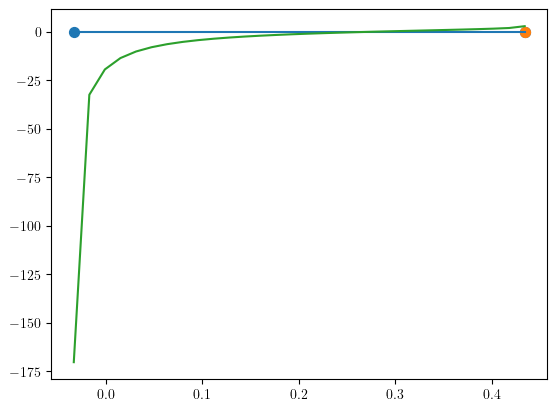

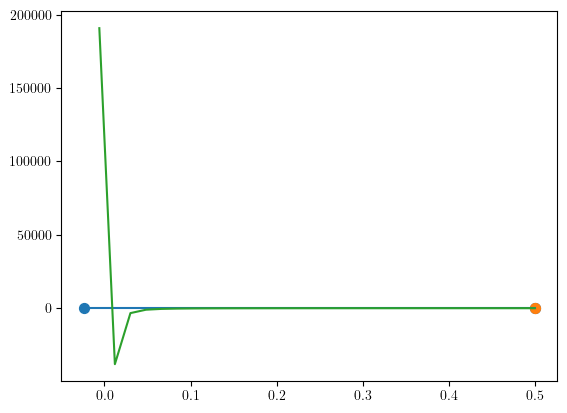

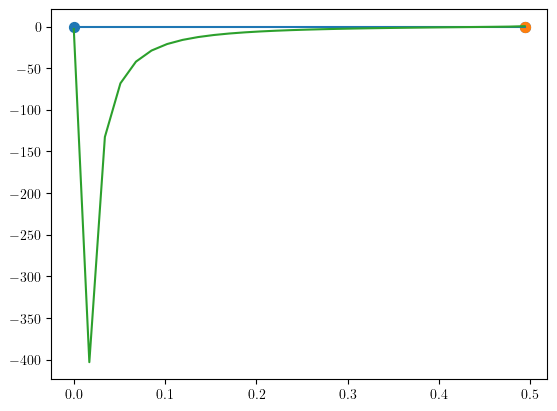

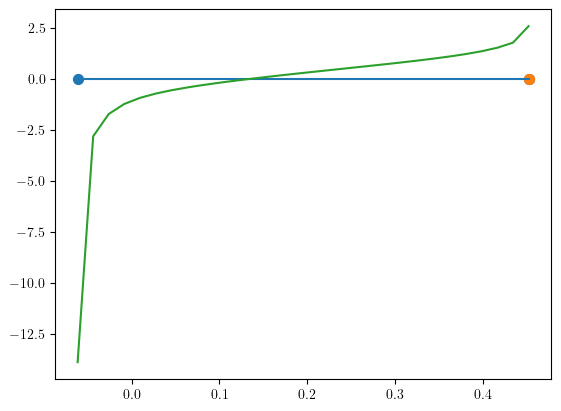

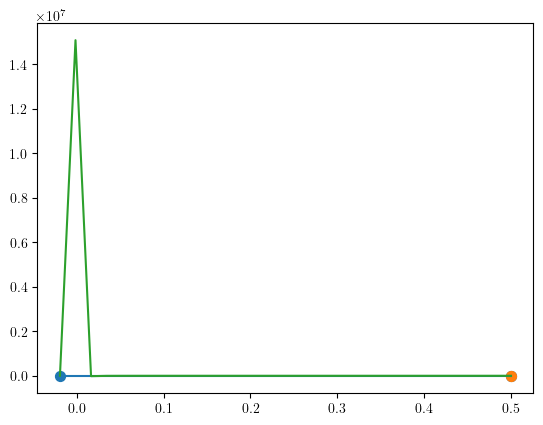

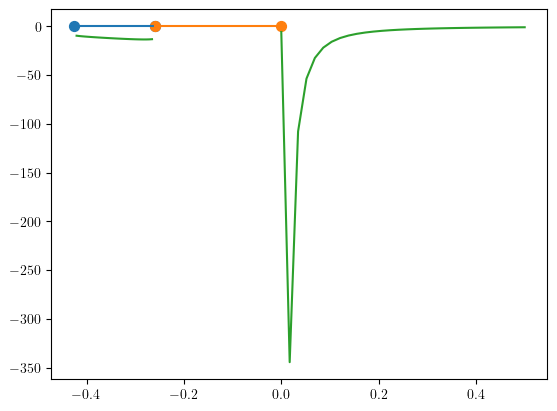

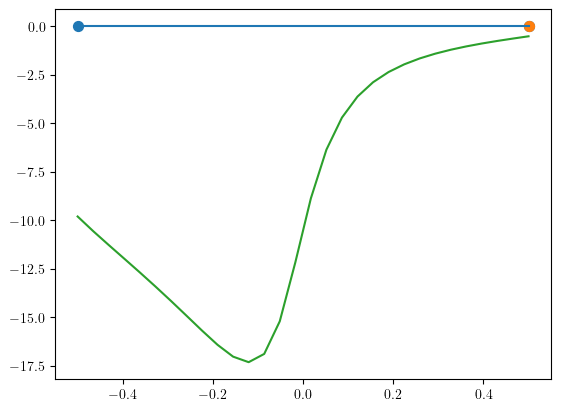

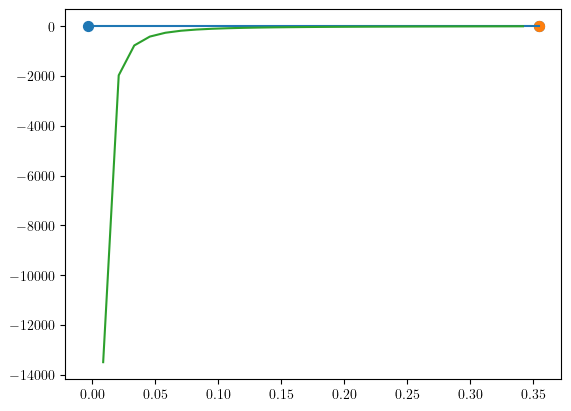

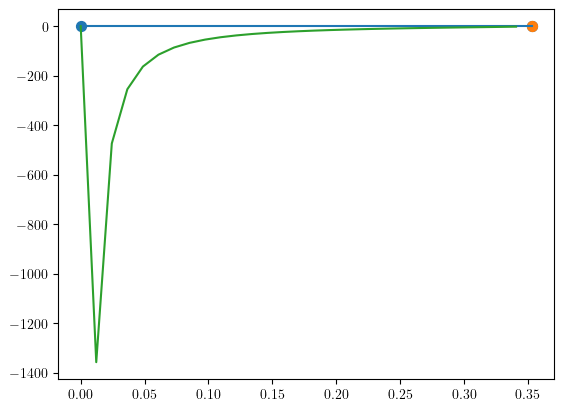

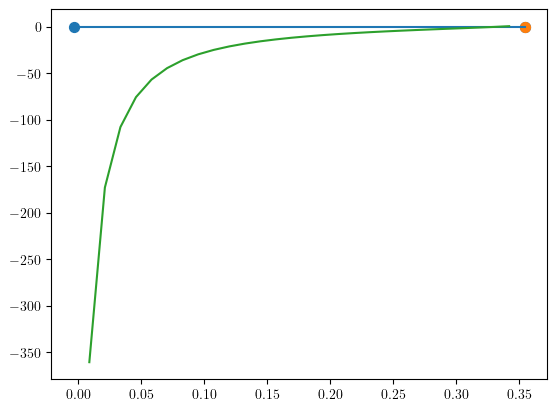

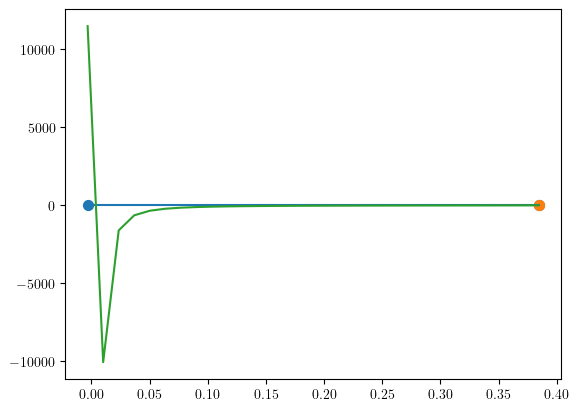

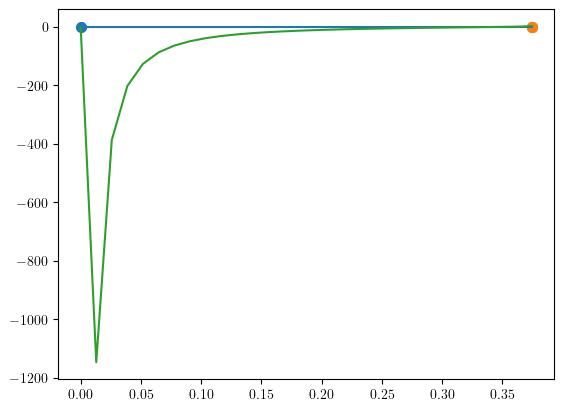

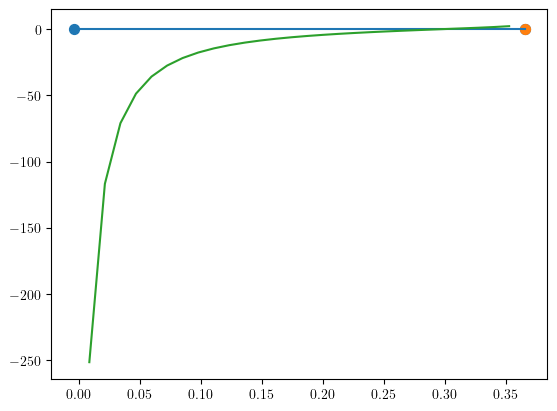

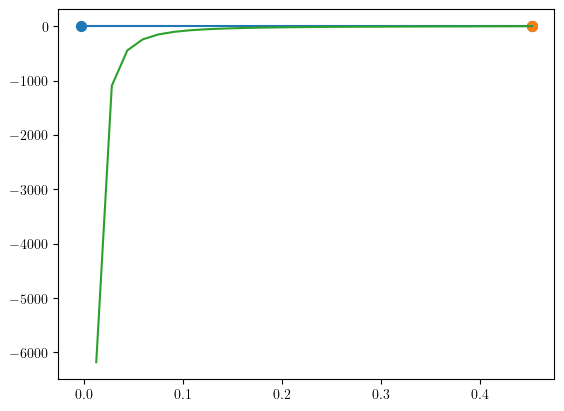

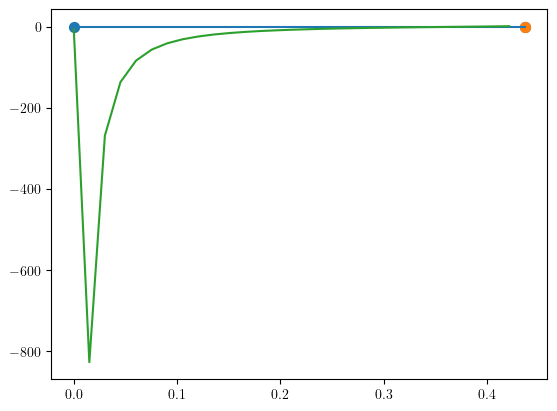

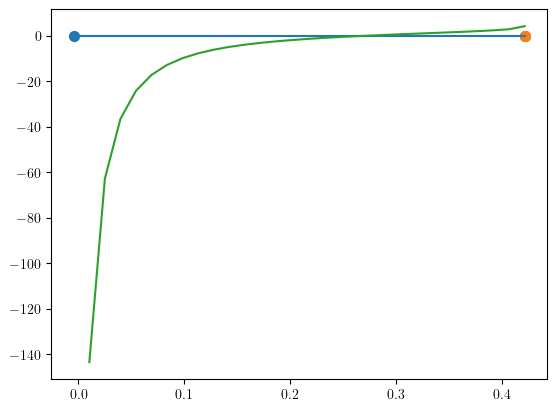

In [76]:
s =1
x = np.linspace(-0.5,0.5)
gridpoints = 3
k= np.linspace(1/10**5,10,gridpoints)
w = np.linspace(0,6,gridpoints)
d = np.linspace(-5,5,gridpoints)
xsol = np.ones((gridpoints,gridpoints,gridpoints,10))
# xgrid = np.linspace(-0.5-1/10**5,0.5+1/10**5,40)
solution_number = np.zeros((gridpoints,gridpoints,gridpoints))
for ik, kval in enumerate(k):
    for iw, wval in enumerate(w):
        for id, dval in enumerate(d):
            sol_numb = 0
            xgrid, points = set_xgird(wval,kval,dval,Gam,sgam,points=True)
            Func = np.zeros_like(xgrid)
            plt.figure()
            for i,x in enumerate(xgrid):
                Func[i]=Fx(x,wval,kval,dval,Gam,sgam,1)
                if i//2==0:
                    plt.scatter(points[i:i+2],np.zeros_like(points[i:i+2]),s=50)
                    plt.plot(points[i:i+2],np.zeros_like(points[i:i+2]))
                plt.plot
            plt.plot(xgrid,Func)
            
            plt.show()

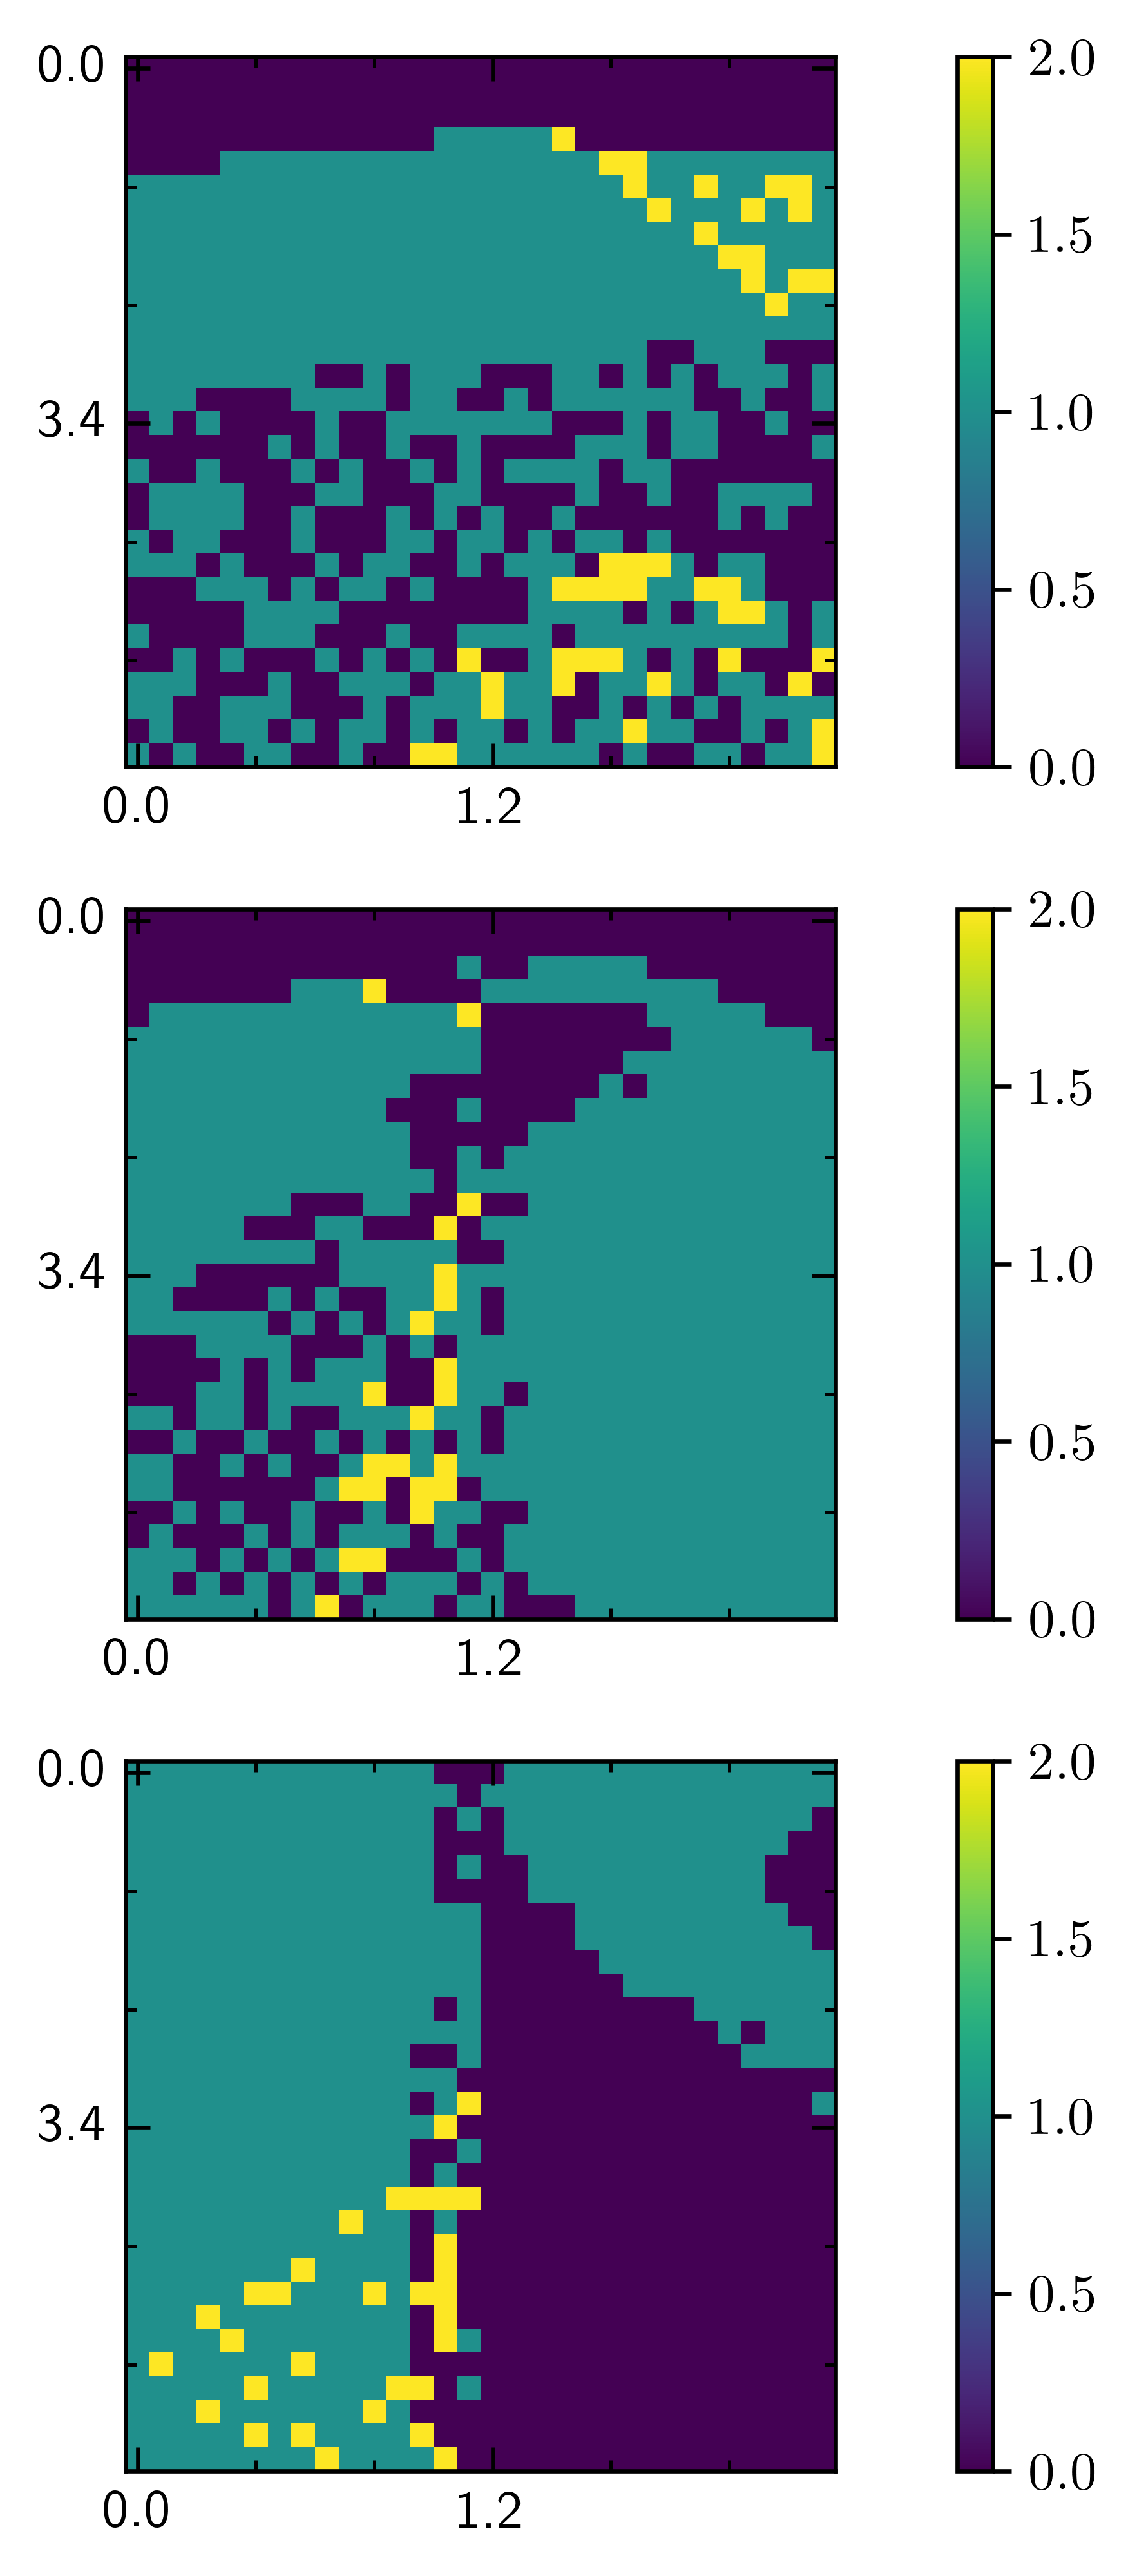

In [46]:
tickformat = Format(xscale=w,yscale=k,xprec="{:.1f}",yprec="{:.1f}")
tickp = TickProperties(SZX=True,SZY=True,\
                       xtick_step_major=15,\
                        xtick_step_minor=5,\
                            ytick_step_major=15,\
                                ytick_step_minor=5)
setup = Setup_Fig(name_of_plot='lam2_anal_ml.png',tickp=tickp,formater=tickformat)
setup.fig_width= 20.6*cm
setup.fig_height=20.6*cm #29.1*cm
setup.DEFAULT_HEAT_EXTEND = (-0.5,64.5,39.5,-0.5)
fig, ax = setup.return_fig(shape=(3,1),dots_per_inch=600)
plots = [solution_number[:,:,5],solution_number[:,9,:],solution_number[6,:,:]]
for i in range(3):
    im = ax[i].imshow(plots[i])#,extent=(-0.5,64.5,39.5,-0.5))
    cbar = fig.colorbar(im,ax=ax[i],orientation='vertical')
plt.show()



In [ ]:
from sympy.abc import gamma, G, kappa, omega, delta, x, y, z, t
from sympy.matrices import Matrix
from sympy import lambdify, simplify, expand
import numpy as np
m = Matrix([x,y,z])
glx = -delta/2*m[1]-(gamma+G)/2*m[0]+kappa*m[0]*m[2]
gly = delta/2*m[0]-omega*m[2]-(gamma+G)/2*m[1]+kappa*m[1]*m[2]
glz = omega*m[1]-kappa*(m[0]**2+m[1]**2)+G/2-G*m[2]
gl = Matrix([glx,gly,glz])
jac_gl = gl.jacobian([m[0],m[1],m[2]])
gl_np = lambdify([t,m,omega,kappa,delta,G,gamma],gl)
jac_gl_np = lambdify([t,m,omega,kappa,delta,G,gamma],jac_gl)
# gl_np(0,[0,2,1],1,1/2,0.2,1), jac_gl_np(0,[0,2,1],1,1/2,0.2,1)
from scipy.integrate import solve_ivp
mz= 1/2 - 1/G*(kappa*(m[0]**2+m[1]**2)-omega*m[1])
jac_gl = simplify(expand(jac_gl.subs(z,mz)))
jac_gl

Matrix([
[(G*(-G - gamma + kappa)/2 - kappa**2*x**2 - kappa**2*y**2 + kappa*omega*y)/G,                                                                     -delta/2,         kappa*x],
[                                                                     delta/2, (G*(-G - gamma + kappa)/2 - kappa**2*x**2 - kappa**2*y**2 + kappa*omega*y)/G, kappa*y - omega],
[                                                                  -2*kappa*x,                                                           -2*kappa*y + omega,              -G]])

In [57]:
sol_index = []
for ik, kval in enumerate(k):
    for iw, wval in enumerate(w):
        for id, dval in enumerate(d):
            if solution_number[ik,iw,id]>0:
                sol_index.append([ik,iw,id,int(solution_number[ik,iw,id])])

[[-3.11355888e+00]
 [ 1.16687215e-11]
 [ 0.00000000e+00]]


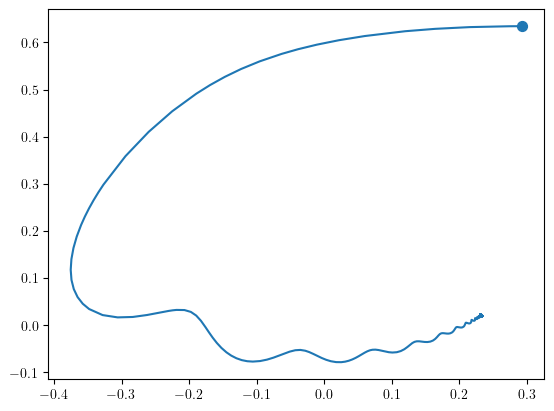

In [62]:
jk, jw,jd, solnumb = sol_index[-4]
kval, wval, dval = k[jk], w[jw], d[jd]

plt.figure()
for sol in xsol[jk,jw,jd,:solnumb]:
    if sol!=0:
        y = y1ofx(sol,wval,kval,dval,Gam,sgam)
        z= m_z(sol,y,wval,kval,Gam)
        plt.scatter(sol,y,s=50)
        mstart = np.array([sol,y,z])
        print(gl_np(0,mstart,wval,kval,dval,Gam,sgam))
arguments = wval,kval, dval, Gam, sgam
traj = solve_ivp(gl_np,(0,1500),mstart,'LSODA',args=arguments)

plt.plot(traj.y[0],traj.y[1])
plt.show()
